In [3]:
import numpy as np
np.random.seed(1)

X = np.array([
    [0,1,0],
    [1,0,0],
    [1,1,1],
    [0,0,1]
])

y = np.array([[0,1,1,0]]).T

(4, 1)


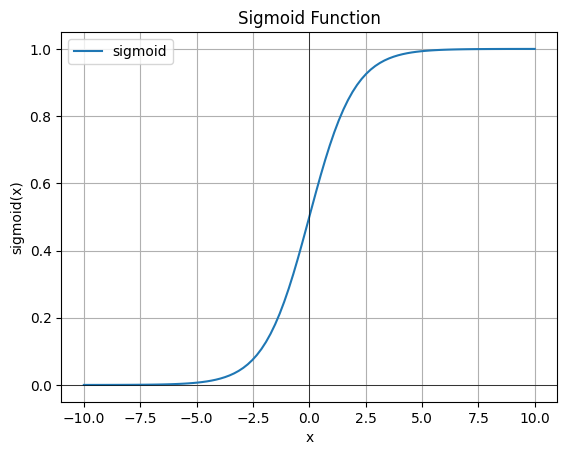

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 입력값 범위 설정
x = np.linspace(-10, 10, 100)  # -10부터 10까지 100개의 점
y = sigmoid(x)  # 시그모이드 적용

# 시각화
plt.plot(x, y, label='sigmoid')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)  # x축
plt.axvline(0, color='black', linewidth=0.5)  # y축
plt.show()

In [18]:
W = 2 * np.random.random((3,1)) - 1
b = 0

Z = X.dot(W) + b

In [19]:
A = sigmoid(Z)
print(A)

[[0.60841366]
 [0.45860596]
 [0.3262757 ]
 [0.2689864 ]]


In [20]:
def bce_loss(y,y_hat):
    N = y.shape[0]
    loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1-y_hat))
    return loss

In [21]:
loss = bce_loss(y,A)
print(loss)

0.7876122314754891


In [22]:
alpha = 1
epochs = 20

losses = []

for i in range(epochs):
    z = X.dot(W) + b
    A = sigmoid(z)

    # 손실 계산
    loss = bce_loss(y, A)
    print('Epoch:', i, 'Loss:', loss)
    losses.append(loss)

    dz = A - y
    dW = np.mean(np.dot(X.T, dz))
    db = np.mean(np.sum(dz, axis=0, keepdims=True))

    W -= alpha * dW
    b -= alpha * db

Epoch: 0 Loss: 0.7876122314754891
Epoch: 1 Loss: 0.7126409645484918
Epoch: 2 Loss: 0.6558365883072452
Epoch: 3 Loss: 0.6226648942667137
Epoch: 4 Loss: 0.597734330680413
Epoch: 5 Loss: 0.5800218677896153
Epoch: 6 Loss: 0.5665040794228257
Epoch: 7 Loss: 0.5558988128708181
Epoch: 8 Loss: 0.5473518954176152
Epoch: 9 Loss: 0.5403449767689826
Epoch: 10 Loss: 0.5345318266932193
Epoch: 11 Loss: 0.5296607458799459
Epoch: 12 Loss: 0.5255422563085845
Epoch: 13 Loss: 0.5220309430729028
Epoch: 14 Loss: 0.5190139191932408
Epoch: 15 Loss: 0.5164027496285868
Epoch: 16 Loss: 0.514127531383692
Epoch: 17 Loss: 0.5121325421575514
Epoch: 18 Loss: 0.5103730001629798
Epoch: 19 Loss: 0.5088126351391361


In [41]:
from keras.layers import Dense, Activation
from keras.models import Sequential

model = Sequential()

model.add(Dense(3, input_dim=3))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

In [43]:
# 만든 모델에 이제 데이터 맞춰보기
history = model.fit(X, y, epochs=900)

Epoch 1/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - acc: 0.7500 - loss: 0.5785
Epoch 2/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - acc: 0.7500 - loss: 0.5775
Epoch 3/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - acc: 0.7500 - loss: 0.5765
Epoch 4/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - acc: 0.7500 - loss: 0.5756
Epoch 5/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - acc: 0.7500 - loss: 0.5746
Epoch 6/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc: 0.7500 - loss: 0.5737
Epoch 7/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 0.7500 - loss: 0.5727
Epoch 8/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - acc: 0.7500 - loss: 0.5717
Epoch 9/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - acc: 0.7500 - loss: 0.5708
Epoch 10/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc: 0.7500 - loss: 0.5698
Epoch 11/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc: 0.7500 - loss: 0.5689
Epoch 12/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc: 0.7500 - loss: 0.5679
Epoch 13/900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/st